In [34]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [35]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [36]:
X_train.shape

(60000, 28, 28)

In [37]:
# We have 28 rows and 28 Colns of one Image and we have 60k such Images
X_train[0].shape

(28, 28)

In [38]:
X_test.shape

(10000, 28, 28)

In [39]:
y_train.shape

(60000,)

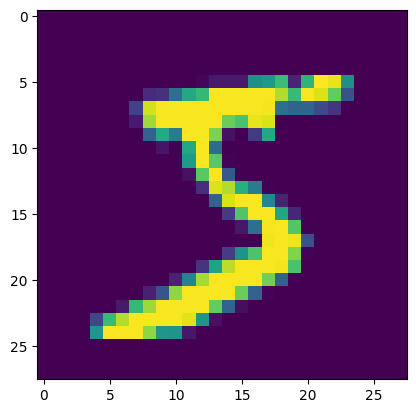

In [40]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [41]:
X_train= X_train/255
X_test = X_test/255

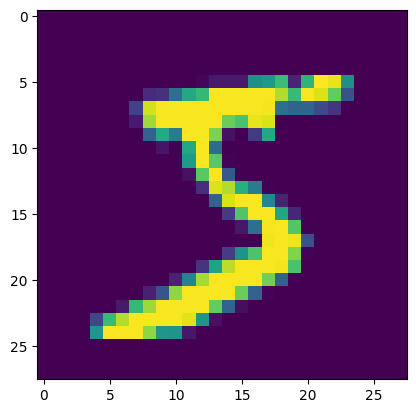

In [42]:
plt.imshow(X_train[0])

In [43]:
# We have all row as 28X28 but we need to convert them to (1,784)

In [44]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) # Converted to 1d
model.add(Dense(128,activation = 'relu')) # we don't need to give Input as o/p of Flatten will be given to flatten
model.add(Dense(10,activation = 'softmax'))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [51]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0139 - val_loss: 0.0966
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0116 - val_loss: 0.1063
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0099 - val_loss: 0.0916
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0074 - val_loss: 0.0992
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0085 - val_loss: 0.0954
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0066 - val_loss: 0.1291
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0080 - val_loss: 0.1193
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0065 - val_loss: 0.1376
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0037 - val_loss: 0.1114
Epoch 10/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.005

In [48]:
y_probab = model.predict(X_test)

313/313 [==============================] - 0s 953us/step


In [49]:
np.argmax(y_probab,axis=1)

# or

y_pred = y_probab.argmax(axis=1)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9785

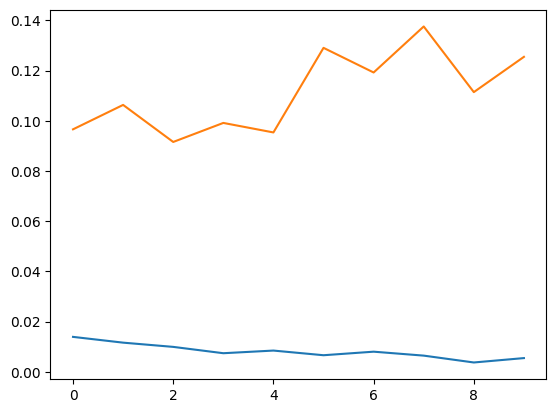

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])